## 00.01 Importaciones

In [62]:
# Manejo de archivos y tiempo
import os
import json
from time import sleep
from datetime import datetime, timedelta

# NumPy y Pandas
import numpy as np
import pandas as pd
import hashlib

# Visualización
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Escalado
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# GridSearchCV y Validación
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, KFold, StratifiedKFold

# Métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.linear_model import LogisticRegression

# Modelos clásicos de series temporales
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tools.sm_exceptions import ConvergenceWarning

# Modelos de machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# PyTorch (Alternativa a Keras/TensorFlow)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Guardado y carga de modelos
import joblib

# Manejo de advertencias
import warnings

In [2]:
# Quiero ver todas las columnas sin elípsis.

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

## 00.02 Declaración de funciones

## 00.02.01 informar_dfs()

In [3]:
def informar_dfs(df):
    datos_nulos = df.isnull().sum().sum()
    cadenas_vacias = df[df == ''].sum().sum()
    nones = df[df == 'None'].sum().sum()
    return f"El Dataframe contiene {int(datos_nulos)} nulos, {int(cadenas_vacias)} cadenas vacias y {int(nones)} 'nones'"

## 01 EDA

### 01.01 Lectura "diabetes_012_health_indicators_BRFSS2015.csv"

In [4]:
path_csv1 = 'data/diabetes_012_health_indicators_BRFSS2015.csv'

df_1 = pd.read_csv(path_csv1)
df_1.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


### 01.01.01 Exploración "diabetes_012_health_indicators_BRFSS2015.csv"

In [5]:
indicadores_df_1 = df_1.copy()
indicadores_df_1.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [6]:
columnas_indicadores_1 = {
    'Diabetes_012': 'Diabetes',
    'HighBP': 'Hipertensión',
    'HighChol': 'Colesterol',
    'CholCheck': 'Análisis_colesterol',
    'BMI': 'IMC',
    'Smoker': 'Fumador',
    'Stroke': 'Ictus',
    'HeartDiseaseorAttack': 'Enfermedad_Cardiaca_Infarto',
    'PhysActivity': 'Actividad_física',
    'Fruits': 'Frutas',
    'Veggies': 'Verduras',
    'HvyAlcoholConsump': 'Consumo_alto_alcohol',
    'AnyHealthcare': 'Cuidado_médico',
    'NoDocbcCost': 'Motivos_económicos ',
    'GenHlth': 'Salud_general',
    'MentHlth': 'Salud_mental',
    'PhysHlth': 'Salud_física',
    'DiffWalk': 'Dificultad_caminar',
    'Sex': 'Sexo',
    'Age': 'Edad',
    'Education': 'Educación',
    'Income': 'Ingresos'
}

indicadores_df_1.rename(columns = columnas_indicadores_1, inplace = True)

indicadores_df_1.sample(10)

,Diabetes,Hipertensión,Colesterol,Análisis_colesterol,IMC,Fumador,Ictus,Enfermedad_Cardiaca_Infarto,Actividad_física,Frutas,Verduras,Consumo_alto_alcohol,Cuidado_médico,Motivos_económicos,Salud_general,Salud_mental,Salud_física,Dificultad_caminar,Sexo,Edad,Educación,Ingresos
83121,0.0,0.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,4.0,5.0,5.0,0.0,0.0,8.0,5.0,5.0
120228,2.0,1.0,1.0,1.0,35.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,4.0,6.0,7.0,0.0,0.0,9.0,5.0,2.0
54319,0.0,1.0,1.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
132935,0.0,1.0,0.0,1.0,32.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0,12.0,3.0,1.0
173928,0.0,1.0,0.0,1.0,35.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,11.0,3.0,7.0
97748,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,6.0,7.0
115238,0.0,1.0,1.0,1.0,36.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,7.0,0.0,0.0,8.0,6.0,4.0
184201,0.0,0.0,0.0,1.0,19.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,7.0,6.0,7.0
156135,0.0,1.0,1.0,1.0,38.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,30.0,7.0,1.0,0.0,6.0,2.0,2.0
76484,0.0,0.0,0.0,0.0,82.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,1.0,2.0,0.0,0.0,7.0,6.0,6.0


In [36]:
indicadores_df_1['Salud_general'].max()

5.0

In [7]:
informar_dfs(indicadores_df_1)

"El Dataframe contiene 0 nulos, 0 cadenas vacias y 0 'nones'"

In [37]:
indicadores_df_1

,Diabetes,Hipertensión,Colesterol,Análisis_colesterol,IMC,Fumador,Ictus,Enfermedad_Cardiaca_Infarto,Actividad_física,Frutas,Verduras,Consumo_alto_alcohol,Cuidado_médico,Motivos_económicos,Salud_general,Salud_mental,Salud_física,Dificultad_caminar,Sexo,Edad,Educación,Ingresos
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


### 01.02 Lectura "diabetes_binary_5050split_health_indicators_BRFSS2015.csv"

In [8]:
path_csv2 = 'data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'

df_2 = pd.read_csv(path_csv2)
df_2.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
5,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,7.0,0.0,0.0,0.0,1.0,4.0,7.0
6,0.0,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,13.0,5.0,6.0
7,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0,6.0,4.0,3.0
8,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,6.0,8.0
9,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,6.0,0.0,1.0,6.0,4.0,4.0


In [9]:
indicadores_df_2 = df_2.copy()

indicadores_df_2.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
5,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,7.0,0.0,0.0,0.0,1.0,4.0,7.0
6,0.0,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,13.0,5.0,6.0
7,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0,6.0,4.0,3.0
8,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,6.0,8.0
9,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,6.0,0.0,1.0,6.0,4.0,4.0


In [10]:
indicadores_df_2.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [11]:
columnas_indicadores_df_2 = {
    'Diabetes_binary': 'Diabetes',
    'HighBP': 'Hipertensión',
    'HighChol': 'Colesterol',
    'CholCheck': 'Análisis_colesterol',
    'BMI': 'IMC',
    'Smoker': 'Fumador',
    'Stroke': 'Ictus',
    'HeartDiseaseorAttack': 'Enfermedad_Cardiaca_Infarto',
    'PhysActivity': 'Actividad_física',
    'Fruits': 'Frutas',
    'Veggies': 'Verduras',
    'HvyAlcoholConsump': 'Consumo_alto_alcohol',
    'AnyHealthcare': 'Cuidado_médico',
    'NoDocbcCost': 'Motivos_económicos ',
    'GenHlth': 'Salud_general',
    'MentHlth': 'Salud_mental',
    'PhysHlth': 'Salud_física',
    'DiffWalk': 'Dificultad_caminar',
    'Sex': 'Sexo',
    'Age': 'Edad',
    'Education': 'Educación',
    'Income': 'Ingresos'
}

indicadores_df_2.rename(columns = columnas_indicadores_df_2, inplace = True)

indicadores_df_2.sample(10)

,Diabetes,Hipertensión,Colesterol,Análisis_colesterol,IMC,Fumador,Ictus,Enfermedad_Cardiaca_Infarto,Actividad_física,Frutas,Verduras,Consumo_alto_alcohol,Cuidado_médico,Motivos_económicos,Salud_general,Salud_mental,Salud_física,Dificultad_caminar,Sexo,Edad,Educación,Ingresos
41625,1.0,1.0,1.0,1.0,30.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,13.0,5.0,4.0
54172,1.0,0.0,1.0,1.0,33.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,4.0,6.0
25823,0.0,0.0,1.0,1.0,27.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,5.0,0.0,1.0,9.0,6.0,8.0
4318,0.0,1.0,0.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,5.0,6.0
18528,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,8.0
18361,0.0,1.0,0.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,6.0,6.0,8.0
6695,0.0,1.0,1.0,1.0,29.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10.0,4.0,4.0
33472,0.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,6.0
40832,1.0,0.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,15.0,10.0,1.0,0.0,9.0,6.0,7.0
6713,0.0,1.0,1.0,1.0,42.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,4.0,25.0,20.0,1.0,0.0,6.0,4.0,1.0


In [12]:
informar_dfs(indicadores_df_2)

"El Dataframe contiene 0 nulos, 0 cadenas vacias y 0 'nones'"

### 01.03 Lectura "diabetes_binary_health_indicators_BRFSS2015.csv"

In [13]:
path_csv3 = 'data/diabetes_binary_health_indicators_BRFSS2015.csv'

df_3 = pd.read_csv(path_csv3)
df_3.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [14]:
indicadores_df_3 = df_3.copy()

indicadores_df_3.tail(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253670,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
253671,0.0,1.0,1.0,1.0,23.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,0.0,5.0,0.0,1.0,8.0,3.0,2.0
253672,0.0,1.0,0.0,1.0,30.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,2.0,1.0
253673,0.0,1.0,0.0,1.0,42.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,14.0,4.0,0.0,1.0,3.0,6.0,8.0
253674,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,5.0
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [15]:
columnas_indicadores_df_3 = {
    'Diabetes_binary': 'Diabetes',
    'HighBP': 'Hipertensión',
    'HighChol': 'Colesterol',
    'CholCheck': 'Análisis_colesterol',
    'BMI': 'IMC',
    'Smoker': 'Fumador',
    'Stroke': 'Ictus',
    'HeartDiseaseorAttack': 'Enfermedad_Cardiaca_Infarto',
    'PhysActivity': 'Actividad_física',
    'Fruits': 'Frutas',
    'Veggies': 'Verduras',
    'HvyAlcoholConsump': 'Consumo_alto_alcohol',
    'AnyHealthcare': 'Cuidado_médico',
    'NoDocbcCost': 'Motivos_económicos ',
    'GenHlth': 'Salud_general',
    'MentHlth': 'Salud_mental',
    'PhysHlth': 'Salud_física',
    'DiffWalk': 'Dificultad_caminar',
    'Sex': 'Sexo',
    'Age': 'Edad',
    'Education': 'Educación',
    'Income': 'Ingresos'
}

indicadores_df_3.rename(columns = columnas_indicadores_df_3, inplace = True)

indicadores_df_3.sample(10)

,Diabetes,Hipertensión,Colesterol,Análisis_colesterol,IMC,Fumador,Ictus,Enfermedad_Cardiaca_Infarto,Actividad_física,Frutas,Verduras,Consumo_alto_alcohol,Cuidado_médico,Motivos_económicos,Salud_general,Salud_mental,Salud_física,Dificultad_caminar,Sexo,Edad,Educación,Ingresos
78696,0.0,1.0,1.0,1.0,31.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,5.0,5.0,4.0
205451,0.0,1.0,0.0,1.0,19.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,8.0,4.0,6.0
180141,1.0,0.0,0.0,1.0,36.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,4.0,7.0
6406,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,4.0,5.0,0.0,0.0,7.0,6.0,5.0
25469,0.0,0.0,0.0,1.0,42.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,3.0,2.0,0.0,1.0,0.0,4.0,5.0,7.0
108683,0.0,1.0,0.0,1.0,39.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,10.0,6.0,5.0
161941,0.0,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,4.0,3.0,12.0,1.0,1.0,5.0,4.0,5.0
12862,0.0,1.0,0.0,1.0,47.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,4.0,8.0
253595,0.0,0.0,0.0,1.0,18.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0
143166,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0


In [16]:
informar_dfs(indicadores_df_3)

"El Dataframe contiene 0 nulos, 0 cadenas vacias y 0 'nones'"

## 02 Gráficas

In [17]:
indicadores_graficas_1 = indicadores_df_1.copy()

### DataFrame 1

#### Matriz de correlación de Pearson
- Mide la relación lineal entre 2 variables.

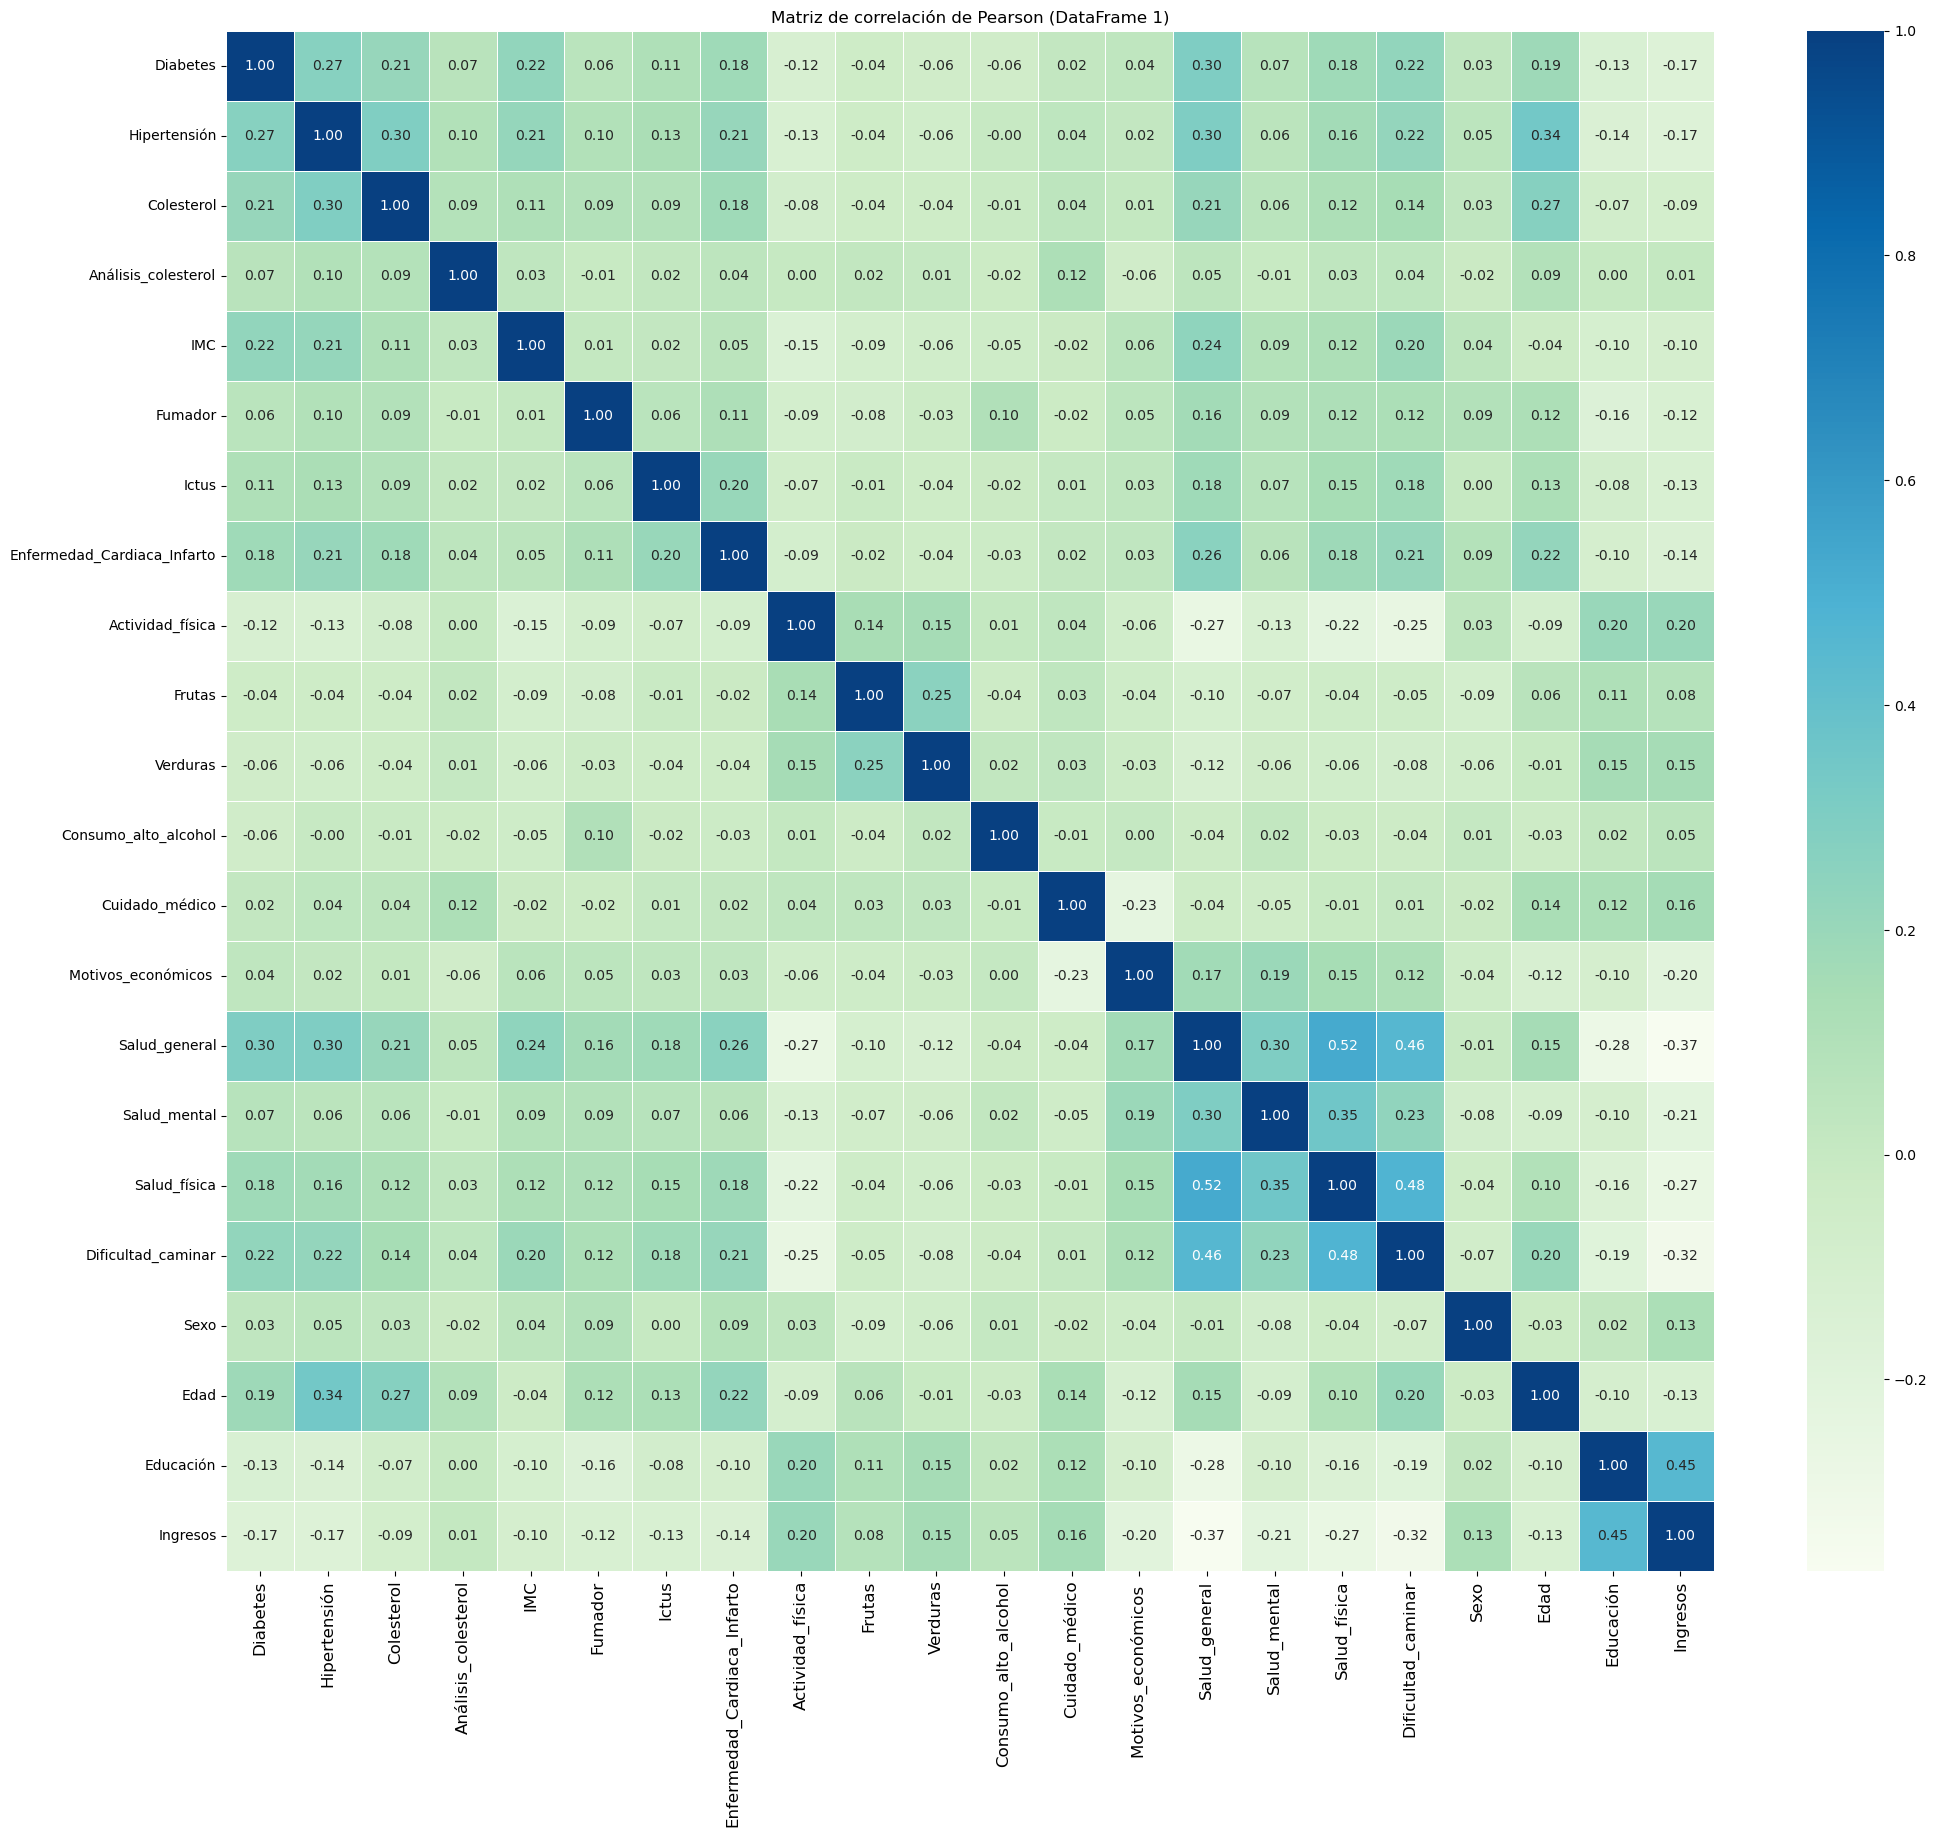

In [18]:
matriz_correlacion_1 = indicadores_df_1.corr()

plt.figure(figsize = (24, 20))
sns.heatmap(matriz_correlacion_1, annot = True, fmt = '.2f', cmap = 'GnBu', linewidths = 0.5)
plt.title('Matriz de correlación de Pearson (DataFrame 1)')
plt.xticks(fontsize = 12)
plt.show()

In [19]:
# Transformo la matriz de correlación de Pearson en un dataframe largo
pares_correlacionados_1 = matriz_correlacion_1.unstack().reset_index()
pares_correlacionados_1.columns = ['Diabetes', 'Variable', 'Correlación de Pearson']

pares_correlacionados_1 = pares_correlacionados_1[pares_correlacionados_1['Diabetes'] == 'Diabetes']

# Crear columna de valor absoluto para poder ordenar (omitiendo negativos). Después eliminar columna una vez ordenada
pares_correlacionados_1['Pearson en valor absoluto'] = pares_correlacionados_1['Correlación de Pearson'].abs()
pares_correlacionados_1 = pares_correlacionados_1.sort_values(by = 'Pearson en valor absoluto', ascending = False).reset_index(drop = True)

pares_correlacionados_1 = pares_correlacionados_1.round(2)
pares_correlacionados_1


,Diabetes,Variable,Correlación de Pearson,Pearson en valor absoluto
0,Diabetes,Diabetes,1.00,1.00
1,Diabetes,Salud_general,0.30,0.30
2,Diabetes,Hipertensión,0.27,0.27
3,Diabetes,IMC,0.22,0.22
4,Diabetes,Dificultad_caminar,0.22,0.22
5,Diabetes,Colesterol,0.21,0.21
6,Diabetes,Edad,0.19,0.19
7,Diabetes,Enfermedad_Cardiaca_Infarto,0.18,0.18
8,Diabetes,Salud_física,0.18,0.18
9,Diabetes,Ingresos,-0.17,0.17


In [20]:
pares_correlacionados_1.drop('Pearson en valor absoluto', axis = 1, inplace = True)
pares_correlacionados_1

,Diabetes,Variable,Correlación de Pearson
0,Diabetes,Diabetes,1.00
1,Diabetes,Salud_general,0.30
2,Diabetes,Hipertensión,0.27
3,Diabetes,IMC,0.22
4,Diabetes,Dificultad_caminar,0.22
5,Diabetes,Colesterol,0.21
6,Diabetes,Edad,0.19
7,Diabetes,Enfermedad_Cardiaca_Infarto,0.18
8,Diabetes,Salud_física,0.18
9,Diabetes,Ingresos,-0.17


#### Boxplot 

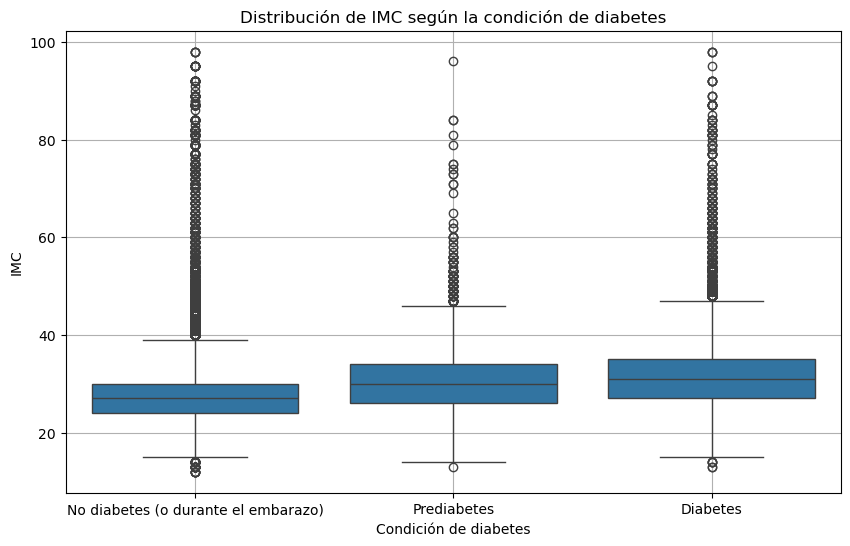

In [21]:
indicadores_graficas_1['Diabetes_etiqueta'] = indicadores_graficas_1['Diabetes'].replace({
    0: 'No diabetes (o durante el embarazo)', 
    1: 'Prediabetes', 
    2: 'Diabetes'
})

# Ordenar los niveles de la condición de diabetes
orden = ['No diabetes (o durante el embarazo)', 'Prediabetes', 'Diabetes']

plt.figure(figsize=(10, 6))
sns.boxplot(x = 'Diabetes_etiqueta', y = 'IMC', data = indicadores_graficas_1, order = orden)

plt.xlabel('Condición de diabetes')
plt.ylabel('IMC')
plt.title('Distribución de IMC según la condición de diabetes')

plt.grid(True)
plt.show()

In [22]:
indicadores_graficas_1.sample(10)

,Diabetes,Hipertensión,Colesterol,Análisis_colesterol,IMC,Fumador,Ictus,Enfermedad_Cardiaca_Infarto,Actividad_física,Frutas,Verduras,Consumo_alto_alcohol,Cuidado_médico,Motivos_económicos,Salud_general,Salud_mental,Salud_física,Dificultad_caminar,Sexo,Edad,Educación,Ingresos,Diabetes_etiqueta
141944,0.0,0.0,1.0,1.0,25.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,4.0,0.0,0.0,0.0,8.0,5.0,8.0,No diabetes (o durante el embarazo)
109724,0.0,1.0,0.0,1.0,37.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,3.0,5.0,0.0,0.0,0.0,9.0,6.0,8.0,No diabetes (o durante el embarazo)
48923,0.0,0.0,1.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,9.0,6.0,1.0,No diabetes (o durante el embarazo)
151290,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,9.0,5.0,8.0,No diabetes (o durante el embarazo)
180048,0.0,1.0,0.0,1.0,21.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,20.0,30.0,1.0,0.0,8.0,6.0,8.0,No diabetes (o durante el embarazo)
199373,2.0,1.0,1.0,1.0,53.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,10.0,30.0,1.0,1.0,10.0,4.0,4.0,Diabetes
178528,2.0,1.0,1.0,1.0,32.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,6.0,8.0,Diabetes
98979,0.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,15.0,0.0,0.0,0.0,8.0,6.0,7.0,No diabetes (o durante el embarazo)
10912,0.0,0.0,1.0,1.0,43.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0,No diabetes (o durante el embarazo)
234944,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,7.0,6.0,8.0,No diabetes (o durante el embarazo)


### DataFrame 2

- “No diabetes (o durante el embarazo)” y “Prediabetes”

In [23]:
indicadores_graficas_2 = indicadores_df_2.copy()

#### Matriz de correlación de Pearson
- Mide la relación lineal entre 2 variables.

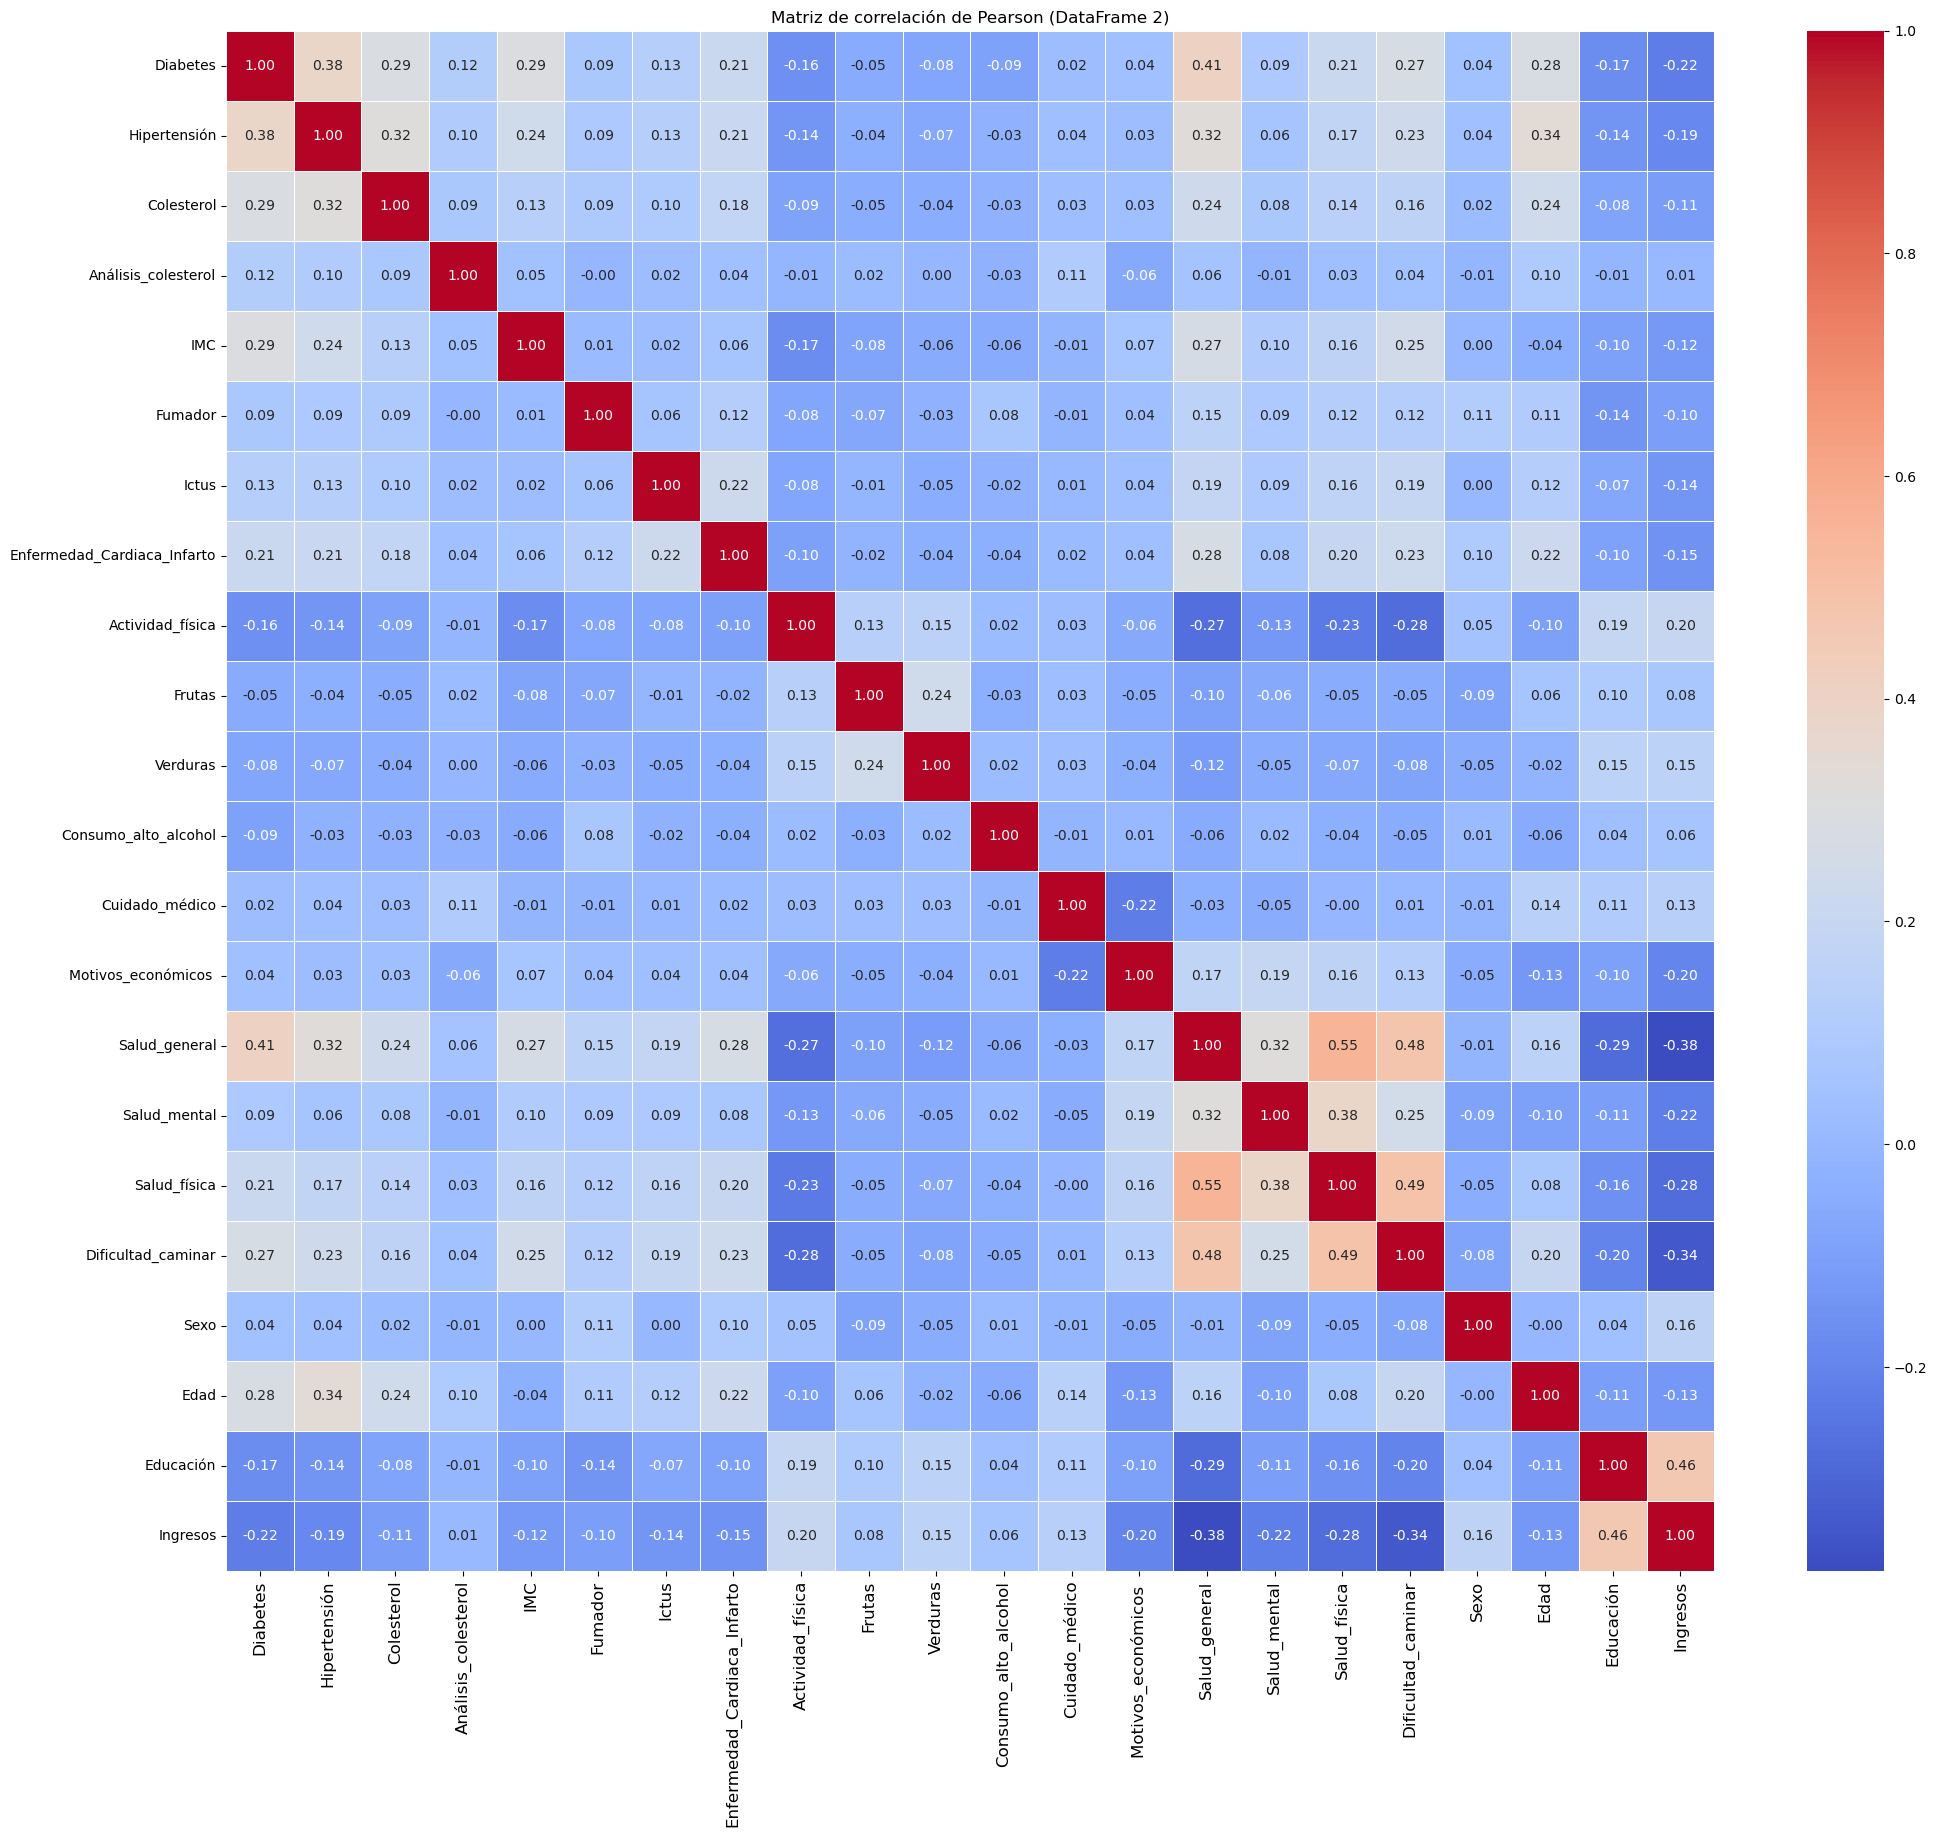

In [24]:
matriz_correlacion_2 = indicadores_df_2.corr()

plt.figure(figsize = (24, 20))
sns.heatmap(matriz_correlacion_2, annot = True, fmt = '.2f', cmap = 'coolwarm', linewidths = 0.5)
plt.title('Matriz de correlación de Pearson (DataFrame 2)')
plt.xticks(fontsize = 12)
plt.show()

In [25]:
# Transformo la matriz de correlación de Pearson en un dataframe largo
pares_correlacionados_2 = matriz_correlacion_2.unstack().reset_index()
pares_correlacionados_2.columns = ['Diabetes', 'Variable', 'Correlación de Pearson']

pares_correlacionados_2 = pares_correlacionados_2[pares_correlacionados_2['Diabetes'] == 'Diabetes']

# Crear columna de valor absoluto para poder ordenar (omitiendo negativos). Después eliminar columna una vez ordenada
pares_correlacionados_2['Pearson en valor absoluto'] = pares_correlacionados_2['Correlación de Pearson'].abs()
pares_correlacionados_2 = pares_correlacionados_2.sort_values(by = 'Pearson en valor absoluto', ascending = False).reset_index(drop = True)

pares_correlacionados_2 = pares_correlacionados_2.round(2)
pares_correlacionados_2

,Diabetes,Variable,Correlación de Pearson,Pearson en valor absoluto
0,Diabetes,Diabetes,1.00,1.00
1,Diabetes,Salud_general,0.41,0.41
2,Diabetes,Hipertensión,0.38,0.38
3,Diabetes,IMC,0.29,0.29
4,Diabetes,Colesterol,0.29,0.29
5,Diabetes,Edad,0.28,0.28
6,Diabetes,Dificultad_caminar,0.27,0.27
7,Diabetes,Ingresos,-0.22,0.22
8,Diabetes,Salud_física,0.21,0.21
9,Diabetes,Enfermedad_Cardiaca_Infarto,0.21,0.21


In [26]:
pares_correlacionados_2.drop('Pearson en valor absoluto', axis = 1, inplace = True)
pares_correlacionados_2

,Diabetes,Variable,Correlación de Pearson
0,Diabetes,Diabetes,1.00
1,Diabetes,Salud_general,0.41
2,Diabetes,Hipertensión,0.38
3,Diabetes,IMC,0.29
4,Diabetes,Colesterol,0.29
5,Diabetes,Edad,0.28
6,Diabetes,Dificultad_caminar,0.27
7,Diabetes,Ingresos,-0.22
8,Diabetes,Salud_física,0.21
9,Diabetes,Enfermedad_Cardiaca_Infarto,0.21


#### Boxplot

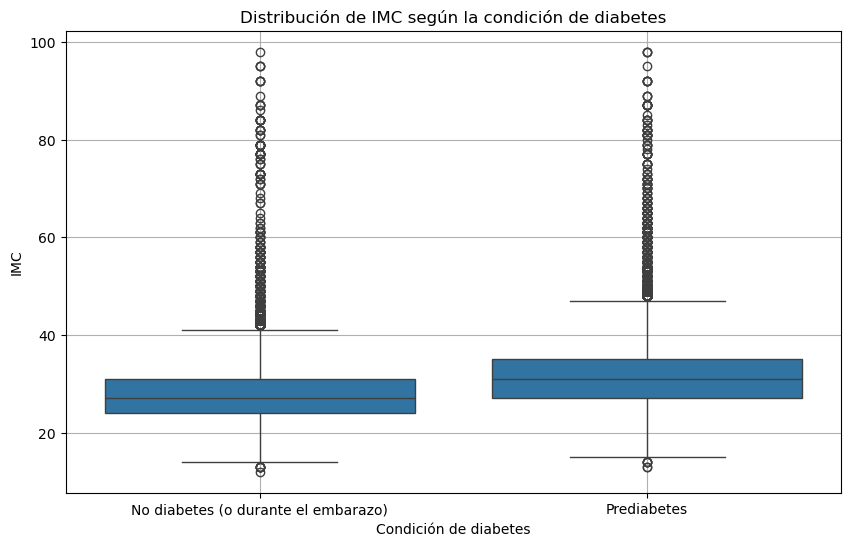

In [27]:
indicadores_graficas_2['Diabetes_etiqueta'] = indicadores_graficas_2['Diabetes'].replace({
    0: 'No diabetes (o durante el embarazo)', 
    1: 'Prediabetes'
})

# Ordenar los niveles de la condición de diabetes
orden = ['No diabetes (o durante el embarazo)', 'Prediabetes']

plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Diabetes_etiqueta', y = 'IMC', data = indicadores_graficas_2, order = orden)

plt.xlabel('Condición de diabetes')
plt.ylabel('IMC')
plt.title('Distribución de IMC según la condición de diabetes')

plt.grid(True)
plt.show()

### DataFrame 3

In [28]:
indicadores_graficas_3 = indicadores_df_3.copy() 

#### Matriz de correlación de Pearson
- Mide la relación lineal entre 2 variables.

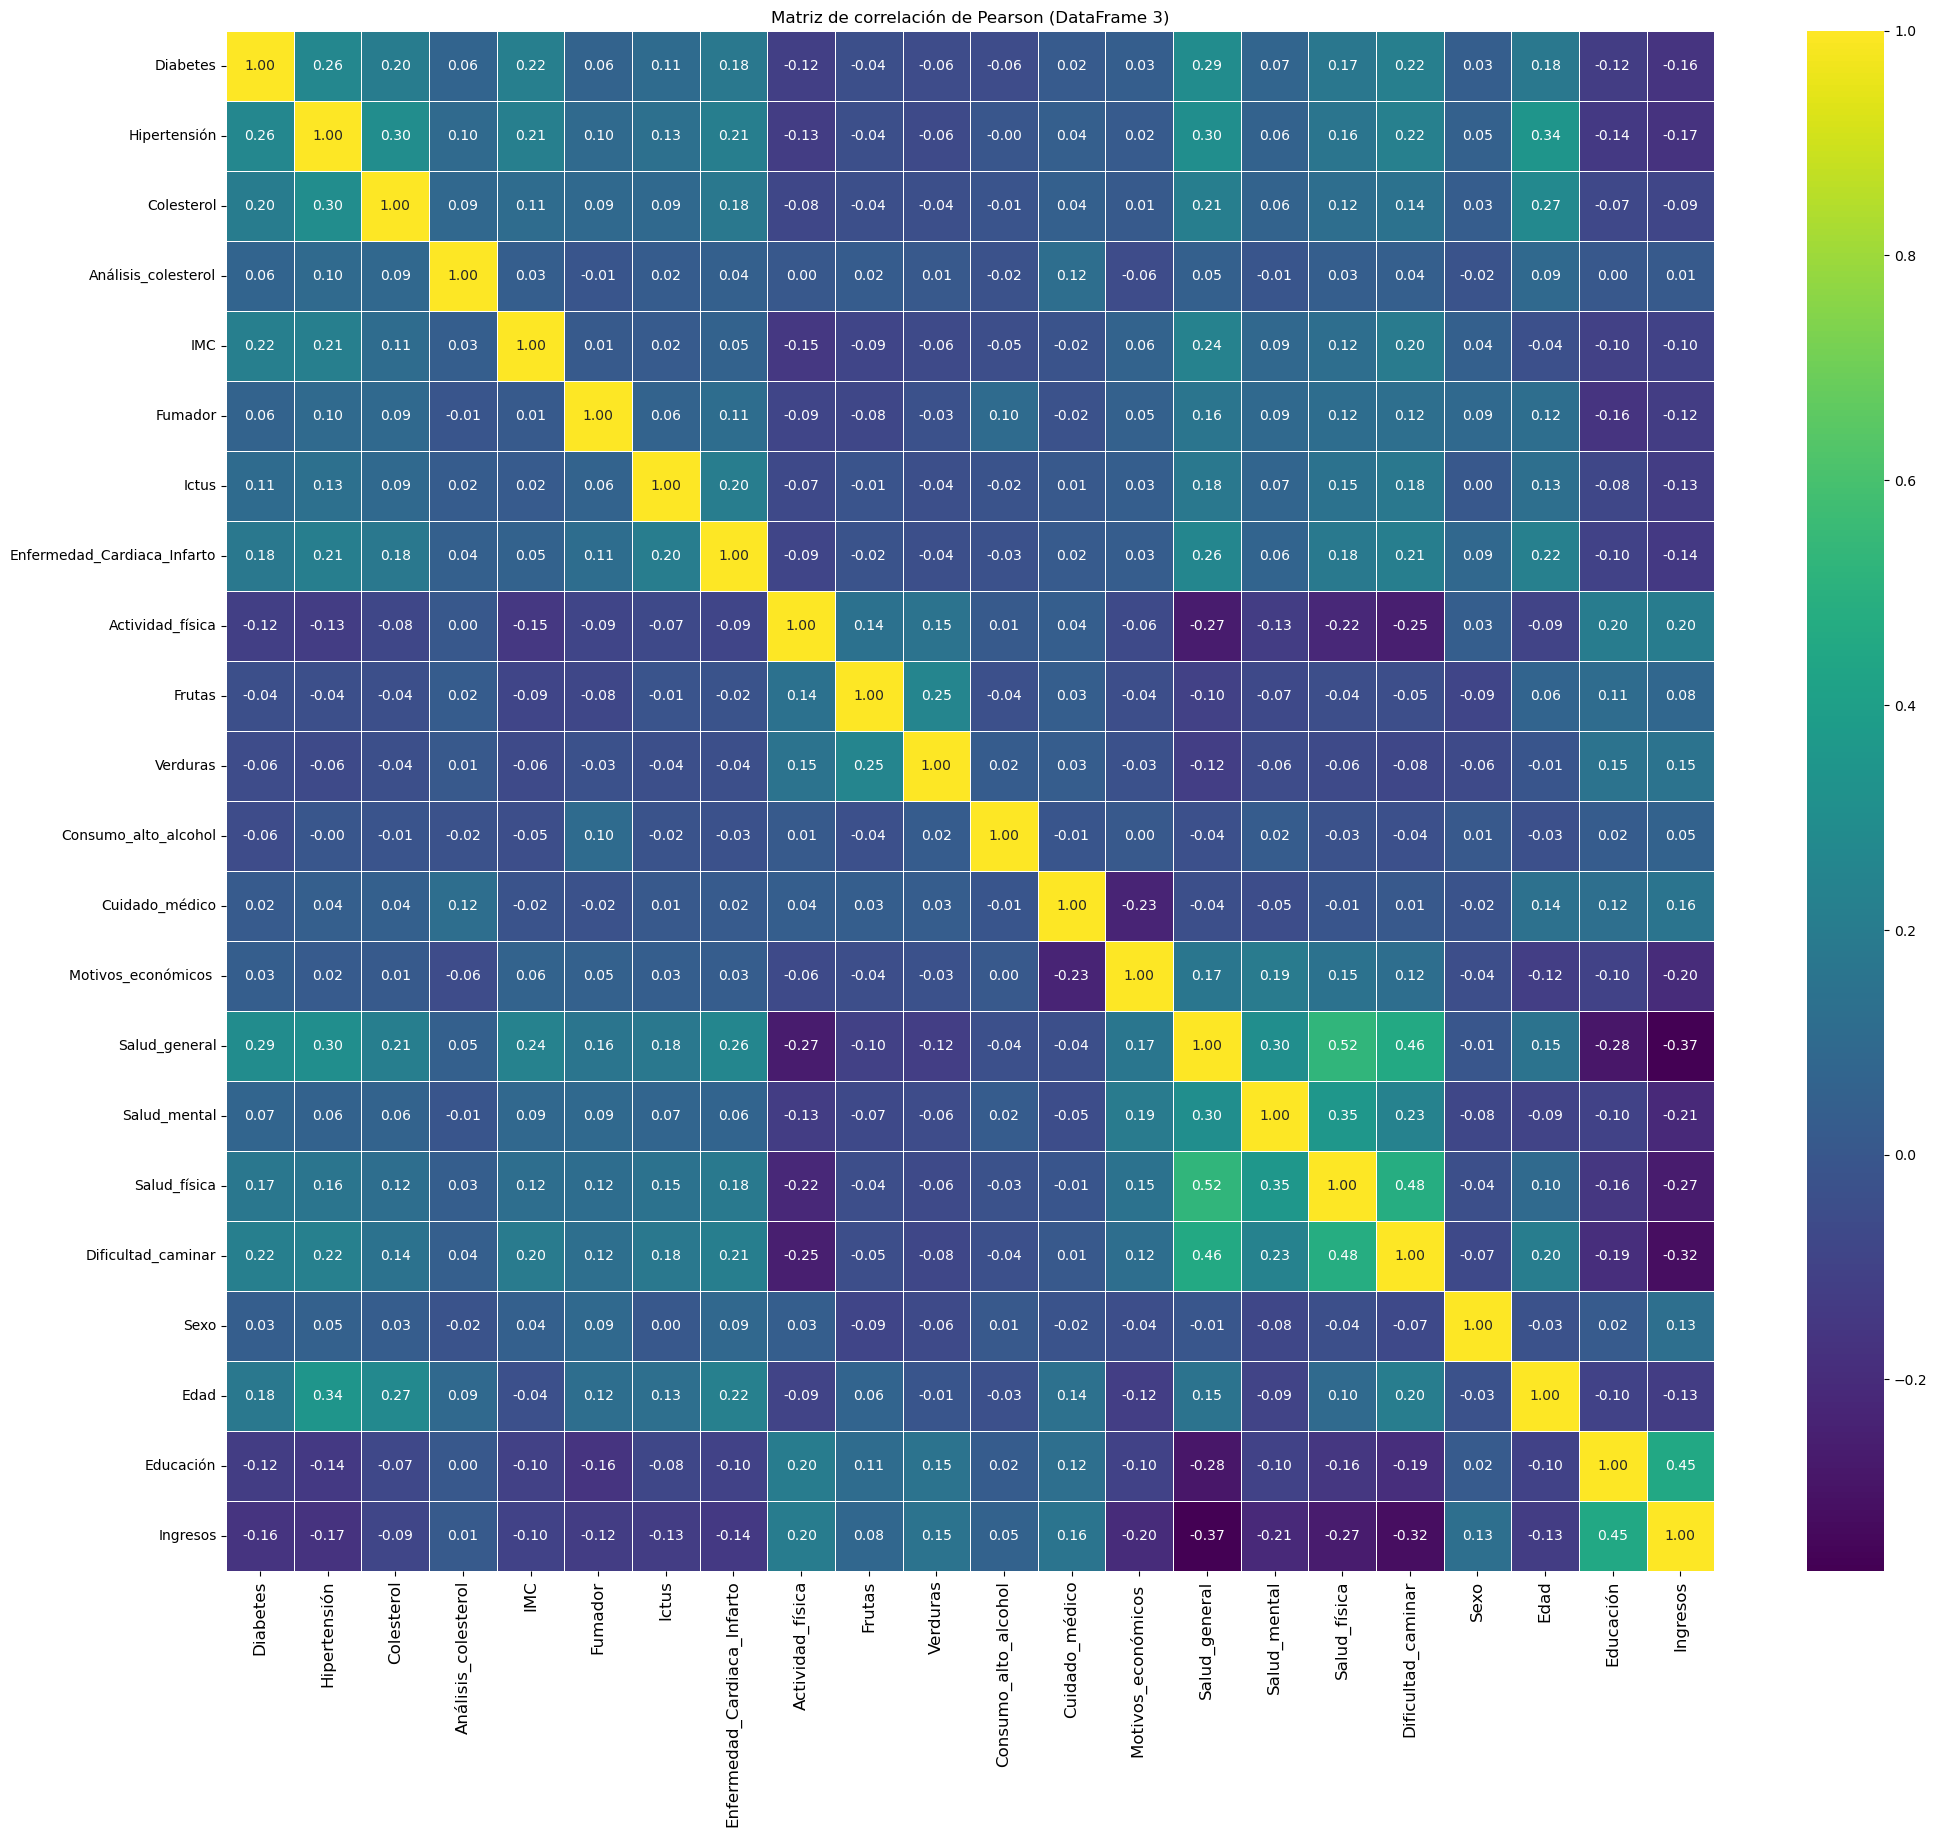

In [29]:
matriz_correlacion_3 = indicadores_df_3.corr()

plt.figure(figsize = (24,20))
sns.heatmap(matriz_correlacion_3, annot = True, fmt = '.2f', cmap = 'viridis', linewidths = 0.5)
plt.title('Matriz de correlación de Pearson (DataFrame 3)')
plt.xticks(fontsize = 12)
plt.show()

In [30]:
pares_correlacionados_3 = matriz_correlacion_3.unstack().reset_index()
pares_correlacionados_3.columns = ['Diabetes', 'Variable', 'Correlación de Pearson']

pares_correlacionados_3 = pares_correlacionados_3[pares_correlacionados_3['Diabetes'] == 'Diabetes']

# Crear columna de valor absoluto para poder ordenar (omitiendo negativos). Después eliminar columna una vez ordenada
pares_correlacionados_3['Pearson en valor absoluto'] = pares_correlacionados_3['Correlación de Pearson'].abs()
pares_correlacionados_3 = pares_correlacionados_3.sort_values(by = 'Pearson en valor absoluto', ascending = False).reset_index(drop = True)

pares_correlacionados_3 = pares_correlacionados_3.round(2)
pares_correlacionados_3

,Diabetes,Variable,Correlación de Pearson,Pearson en valor absoluto
0,Diabetes,Diabetes,1.00,1.00
1,Diabetes,Salud_general,0.29,0.29
2,Diabetes,Hipertensión,0.26,0.26
3,Diabetes,Dificultad_caminar,0.22,0.22
4,Diabetes,IMC,0.22,0.22
5,Diabetes,Colesterol,0.20,0.20
6,Diabetes,Edad,0.18,0.18
7,Diabetes,Enfermedad_Cardiaca_Infarto,0.18,0.18
8,Diabetes,Salud_física,0.17,0.17
9,Diabetes,Ingresos,-0.16,0.16


In [31]:
pares_correlacionados_3.drop('Pearson en valor absoluto', axis = 1, inplace = True)
pares_correlacionados_3

,Diabetes,Variable,Correlación de Pearson
0,Diabetes,Diabetes,1.00
1,Diabetes,Salud_general,0.29
2,Diabetes,Hipertensión,0.26
3,Diabetes,Dificultad_caminar,0.22
4,Diabetes,IMC,0.22
5,Diabetes,Colesterol,0.20
6,Diabetes,Edad,0.18
7,Diabetes,Enfermedad_Cardiaca_Infarto,0.18
8,Diabetes,Salud_física,0.17
9,Diabetes,Ingresos,-0.16


#### Boxplot 

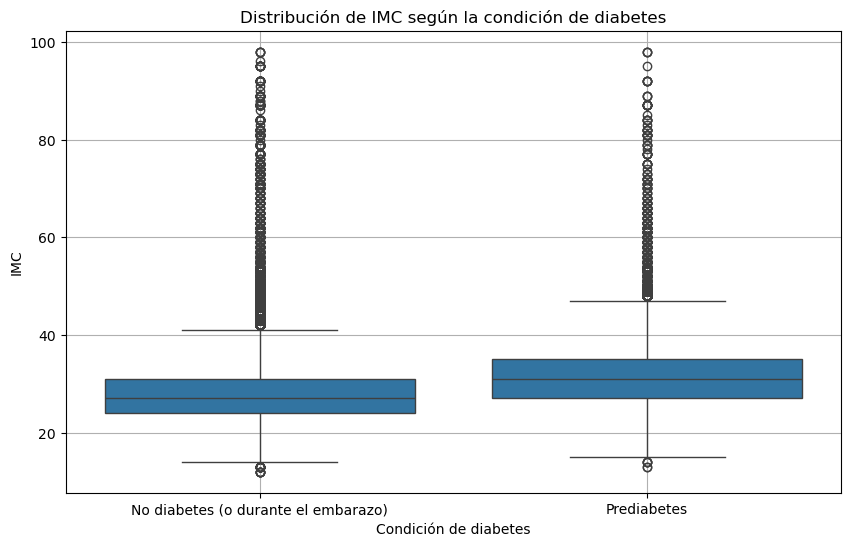

In [32]:
indicadores_graficas_3['Diabetes_etiqueta'] = indicadores_graficas_3['Diabetes'].replace({
    0: 'No diabetes (o durante el embarazo)', 
    1: 'Prediabetes'
})

# Ordenar los niveles de la condición de diabetes
orden = ['No diabetes (o durante el embarazo)', 'Prediabetes']

plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Diabetes_etiqueta', y = 'IMC', data = indicadores_graficas_3, order = orden)

plt.xlabel('Condición de diabetes')
plt.ylabel('IMC')
plt.title('Distribución de IMC según la condición de diabetes')

plt.grid(True)
plt.show()

## 03 Modelos, Métricas y Métodos de Validación

- Uso registros para predecir si una persona es diabética o no **clasificación binaria** 
- Aplicaré varias técnicas de Machine Learning.
- Realizaré diferentes algoritmos para ver cuál se ajusta mejor, como regresión logística, árboles de decisión o incluso modelos más avanzados como XGBoost o LightGBM.

### 03.01 Metricas

### 03.02 Modelos

In [42]:
modelo_df_1 = indicadores_df_1.copy()
modelo_df_1

,Diabetes,Hipertensión,Colesterol,Análisis_colesterol,IMC,Fumador,Ictus,Enfermedad_Cardiaca_Infarto,Actividad_física,Frutas,Verduras,Consumo_alto_alcohol,Cuidado_médico,Motivos_económicos,Salud_general,Salud_mental,Salud_física,Dificultad_caminar,Sexo,Edad,Educación,Ingresos
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


##### Logistic Regression

In [45]:
X = modelo_df_1[['Edad', 'IMC', 'Hipertensión', 'Colesterol', 'Actividad_física', 'Fumador']]
y = modelo_df_1['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 43)

modelo = LogisticRegression(max_iter = 1000)
modelo.fit(X_train, y_train)

y_predic = modelo.predict(X_test)

print(classification_report(y_test, y_predic))

              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91     64227
         1.0       0.00      0.00      0.00      1394
         2.0       0.49      0.07      0.13     10483

    accuracy                           0.84     76104
   macro avg       0.45      0.35      0.35     76104
weighted avg       0.79      0.84      0.79     76104



/Users/alexiagarciamayor/envs/alexia-ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/alexiagarciamayor/envs/alexia-ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/alexiagarciamayor/envs/alexia-ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

##### SMOTE

In [49]:
X = modelo_df_1[['Edad', 'IMC', 'Hipertensión', 'Colesterol', 'Actividad_física', 'Fumador']]
y = modelo_df_1['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 43)

smote_model = SMOTE(random_state = 43)
X_train_smote, y_train_smote = smote_model.fit_resample(X_train, y_train)

modelo = LogisticRegression(max_iter = 1000)
modelo.fit(X_train_smote, y_train_smote)

y_predic = modelo.predict(X_test)

print(classification_report(y_test, y_predic))

              precision    recall  f1-score   support

         0.0       0.94      0.65      0.77     64227
         1.0       0.03      0.20      0.05      1394
         2.0       0.30      0.62      0.41     10483

    accuracy                           0.64     76104
   macro avg       0.42      0.49      0.41     76104
weighted avg       0.84      0.64      0.71     76104



##### Random Forest

In [55]:
# Entreno modelo Random Forest con ajuste
random_forest_model = RandomForestClassifier(n_estimators = 200, max_depth = 10, class_weight = {0: 1, 1: 10, 2: 5}, random_state = 43)
random_forest_model.fit(X_train_smote, y_train_smote)

# Predecir conjunto de prueba
y_predic_rf = random_forest_model.predict(X_test)

# Evaluación modelo
print(classification_report(y_test, y_predic_rf))

              precision    recall  f1-score   support

         0.0       0.98      0.12      0.22     64227
         1.0       0.02      0.66      0.03      1394
         2.0       0.27      0.42      0.33     10483

    accuracy                           0.17     76104
   macro avg       0.42      0.40      0.19     76104
weighted avg       0.87      0.17      0.23     76104



##### Gradient Boosting

In [58]:
gradient_boost_model = GradientBoostingClassifier(n_estimators = 300, max_depth = 4, learning_rate = 0.05, random_state = 43)
gradient_boost_model.fit(X_train_smote, y_train_smote)

# Predicción
y_predict_gradient = gradient_boost_model.predict(X_test)

# Evaluación
print(classification_report(y_test, y_predict_gradient))

              precision    recall  f1-score   support

         0.0       0.93      0.72      0.81     64227
         1.0       0.03      0.03      0.03      1394
         2.0       0.29      0.70      0.41     10483

    accuracy                           0.70     76104
   macro avg       0.42      0.48      0.42     76104
weighted avg       0.83      0.70      0.74     76104



##### XGBoost

In [61]:
## Creo un DMatrix de XGBoost
dtrain = xgb.DMatrix(X_train_smote, label = y_train_smote)
dtest = xgb.DMatrix(X_test, label = y_test)

# Entrenamiento del modelo con scale_pos_weight
xgboost_model = xgb.XGBClassifier(n_estimators = 300, max_depth = 4, learning_rate = 0.05, random_state = 43)
xgboost_model.fit(X_train_smote, y_train_smote)

# Predicción
y_predic_xgb = xgboost_model.predict(X_test)

print(classification_report(y_test, y_predic_xgb))

              precision    recall  f1-score   support

         0.0       0.93      0.71      0.81     64227
         1.0       0.03      0.03      0.03      1394
         2.0       0.29      0.71      0.41     10483

    accuracy                           0.70     76104
   macro avg       0.42      0.48      0.42     76104
weighted avg       0.83      0.70      0.74     76104



##### ADASYN

In [67]:
# Uso ADASYN solo para prediabetes (1.0)
adasyn = ADASYN(sampling_strategy = 'auto', random_state = 43)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Entrenamiento modelo XGBoost con ADASYN
xgboost_model = xgb.XGBClassifier(n_estimators = 300, max_depth = 4, learning_rate = 0.05, random_state = 43)
xgboost_model.fit(X_train_adasyn, y_train_adasyn)

# Predicción
y_predic_xgb_adasyn = xgboost_model.predict(X_test)

print(classification_report(y_test, y_predic_xgb_adasyn))

              precision    recall  f1-score   support

         0.0       0.94      0.68      0.79     64227
         1.0       0.03      0.02      0.02      1394
         2.0       0.27      0.75      0.40     10483

    accuracy                           0.68     76104
   macro avg       0.41      0.48      0.40     76104
weighted avg       0.83      0.68      0.72     76104



##### LightGBM

In [ ]:
import lightgbm as lgb
from sklearn.metrics import classification_report

# Entrenar el modelo LightGBM
lightgbm_model = lgb.LGBMClassifier(n_estimators=300, max_depth=4, learning_rate=0.05, random_state=43, class_weight='balanced')
lightgbm_model.fit(X_train_smote, y_train_smote)

# Predicción
y_predic_lightgbm = lightgbm_model.predict(X_test)

# Evaluación del modelo
print(classification_report(y_test, y_predic_lightgbm))

### 03.03 Métodos de Validación